In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [5]:
def plot_examples(images, labels):
    f, axarr = plt.subplots(1, len(images))
    for ax, img, label in zip(axarr, images, labels):
        ax.imshow(img)
        ax.set_title(label)

def plot_traning_curves(history):
    categorical_accuracy, = plt.plot(history.history["sparse_categorical_accuracy"], label='categorical_accuracy')
    val_categorical_accuracy, = plt.plot(
        history.history["val_sparse_categorical_accuracy"], label='val_categorical_accuracy'
    )
    loss_plt, = plt.plot(history.history["loss"], label='loss')
    val_loss_plt, = plt.plot(history.history["val_loss"], label='val_loss')
    plt.legend(handles=[categorical_accuracy, val_categorical_accuracy, loss_plt, val_loss_plt])
    
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
model = keras.Sequential()
# here, Conv2D requires 4d tensors
model.add(layers.Conv2D(16, kernel_size=5, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# logits (numeric output of the last linear layer of a multi-class classification neural network)

loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=keras.optimizers.RMSprop(), loss=loss, metrics=['sparse_categorical_accuracy'])

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data (these are Numpy arrays)
x_train = x_train.astype('float32') / 255  # Conv2D layer requires 4D input
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [13]:
filepath = "cifar10-3d.hdf5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, min_delta=0.000, verbose=1),
    ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, verbose=1)
]

In [14]:
# Train
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1, callbacks=callbacks, verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
44800/45000 [============================>.] - ETA: 0s - loss: 1.6956 - sparse_categorical_accuracy: 0.4022
Epoch 00001: val_loss improved from inf to 1.58140, saving model to cifar10-3d.hdf5
45000/45000 [==============================] - 8s 167us/sample - loss: 1.6943 - sparse_categorical_accuracy: 0.4025 - val_loss: 1.5814 - val_sparse_categorical_accuracy: 0.4328
Epoch 2/15
44736/45000 [============================>.] - ETA: 0s - loss: 1.3888 - sparse_categorical_accuracy: 0.5111
Epoch 00002: val_loss did not improve from 1.58140
45000/45000 [==============================] - 7s 159us/sample - loss: 1.3885 - sparse_categorical_accuracy: 0.5111 - val_loss: 1.6242 - val_sparse_categorical_accuracy: 0.4310
Epoch 3/15
44736/45000 [============================>.] - ETA: 0s - loss: 1.2542 - sparse_categorical_accuracy: 0.5627
Epoch 00003: val_loss improved from 1.58140 to 1.47408, saving model to cifar10-3d.hdf5
45000/45000 [====

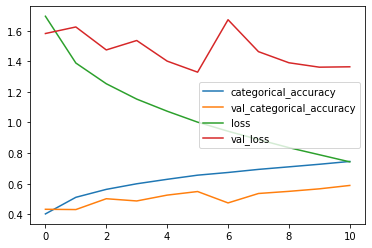

In [15]:
# plot training curves
plot_traning_curves(history)

Testing accuracy 0.5413


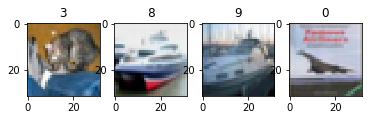

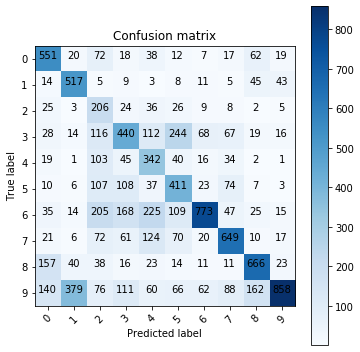

In [18]:
# Test
model.load_weights(filepath)

output_results = model.predict(x_test)
y_predict = [np.argmax(output) for output in output_results]

display_num = 4
plot_examples(x_test[:display_num], y_predict[:display_num])

cm = confusion_matrix(y_predict, y_test, labels=range(10))
plot_confusion_matrix(cm, classes=range(10))

accuracy = accuracy_score(y_predict, y_test)
print(f"Testing accuracy {accuracy}")
plt.show()